# Open Dataset and visualize images

Dataset size: 18


<Figure size 432x288 with 0 Axes>

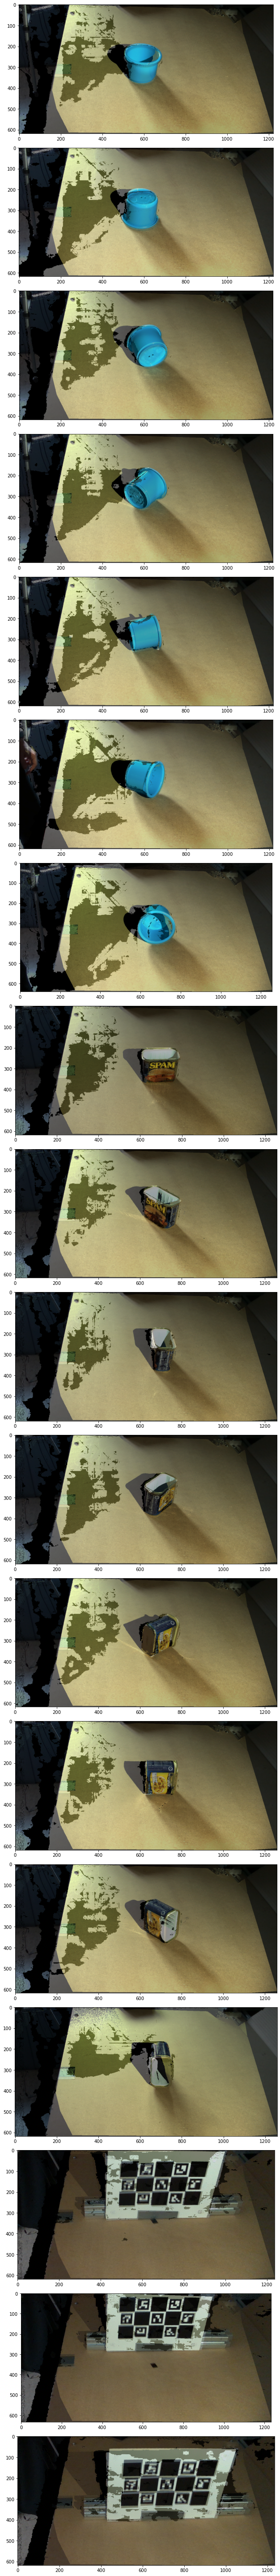

In [8]:
from models.dataset.dataset_interface import DatasetInterface
from matplotlib import pyplot as plt
from pathlib import Path
from utils.visualization_utils import to_rgb, visualize_depth

# dataset_file = Path("../../resources/images/calibrated/undistorted_1.npz")
dir_to_visualize = Path("../../resources/images/calibrated/3d_aligned/dataset_1")

dataset_interface = DatasetInterface(dir_to_visualize)
print(f"Dataset size: {len(dataset_interface)}")

plt.figure()
f, axarr = plt.subplots(len(dataset_interface), 1, figsize=(30, 80))
f.tight_layout()

for i, (rs_rgb, rs_depth, zv_rgb, zv_depth) in enumerate(dataset_interface):
    axarr[i][0].imshow(to_rgb(rs_rgb))
    axarr[i][1].imshow(visualize_depth(rs_depth))
    axarr[i][2].imshow(to_rgb(zv_rgb))
    axarr[i][3].imshow(visualize_depth(zv_depth))

# Convert from old to new dataset interface

In [19]:
from models.dataset.dataset_interface import DatasetInterface, DatasetContainer
from pathlib import Path

dataset_container = DatasetContainer()
file = "c_dataset_v_1"
dir = Path("../../resources/images/calibrated")
dataset_container.load_from_dataset(dir / f"{file}.npz")
print(f"{dataset_container.size()}")

dataset_interface = DatasetInterface(dir / file)
dataset_interface.convert_from_old(dataset_container)

15


# Image Augmentation

(1200, 1920, 1)
782.27 779.9057


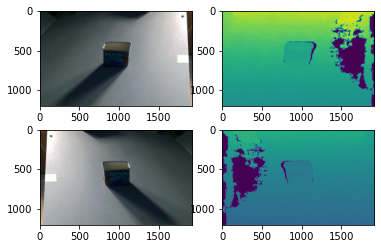

In [53]:
from models.dataset.dataset_interface import DatasetInterface
from pathlib import Path
from matplotlib import pyplot as plt
dataset_interface = DatasetInterface(Path("../../resources/images/calibrated"))
rs_rgb, rs_depth, zv_rgb, zv_depth = dataset_interface[0]

import numpy as np
rs_depth = rs_depth.astype(np.float32)
rs_depth = np.expand_dims(rs_depth, axis=2)
print(rs_depth.shape)

from imgaug import augmenters as iaa
from imgaug import HeatmapsOnImage

seq = iaa.Sequential([
    iaa.Crop(px=(0, 16)), # crop images from each side by 0 to 16px (randomly chosen)
    iaa.Fliplr(0.5), # horizontally flip 50% of the images
    iaa.GaussianBlur(sigma=(0, 3.0)) # blur images with a sigma of 0 to 3.0
])

rs_depth_hm = HeatmapsOnImage(rs_depth, min_value=0, max_value=2000.0, shape=(rs_depth.shape))

images_aug = seq(images=[rs_rgb], heatmaps=[rs_depth_hm])

print(np.mean(images_aug[1][0].get_arr()), np.mean(rs_depth))

_, axarr = plt.subplots(2, 2)
axarr[0][0].imshow(images_aug[0][0])
axarr[0][1].imshow(images_aug[1][0].get_arr())
axarr[1][0].imshow(rs_rgb)
axarr[1][1].imshow(rs_depth)

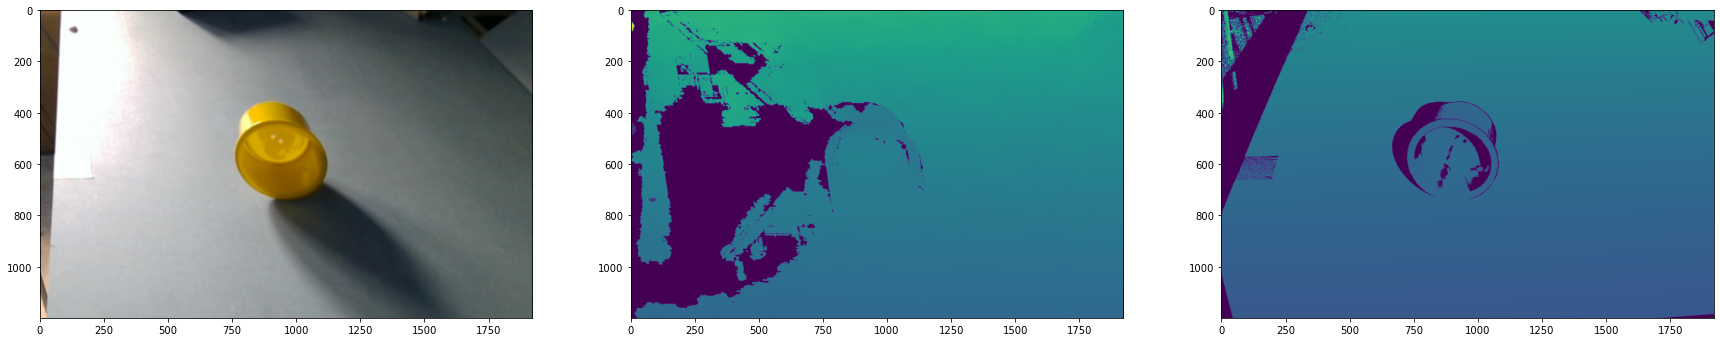

In [16]:
from models.dataset.data_loading import BasicDataset
from matplotlib import pyplot as plt
from pathlib import Path
import numpy as np

dataset = BasicDataset(dataset_path=Path("../../resources/images/calibrated"))
map = dataset[6]
image = map['image']
mask = map['mask']

rs_rgb = np.transpose(image[:3], (1, 2, 0))
rs_depth = image[3]
zv_depth = np.transpose(mask, (1, 2, 0))

_, axarr = plt.subplots(1, 3, figsize=(30, 10))
axarr[0].imshow(rs_rgb)
axarr[1].imshow(rs_depth)
axarr[2].imshow(zv_depth)


True

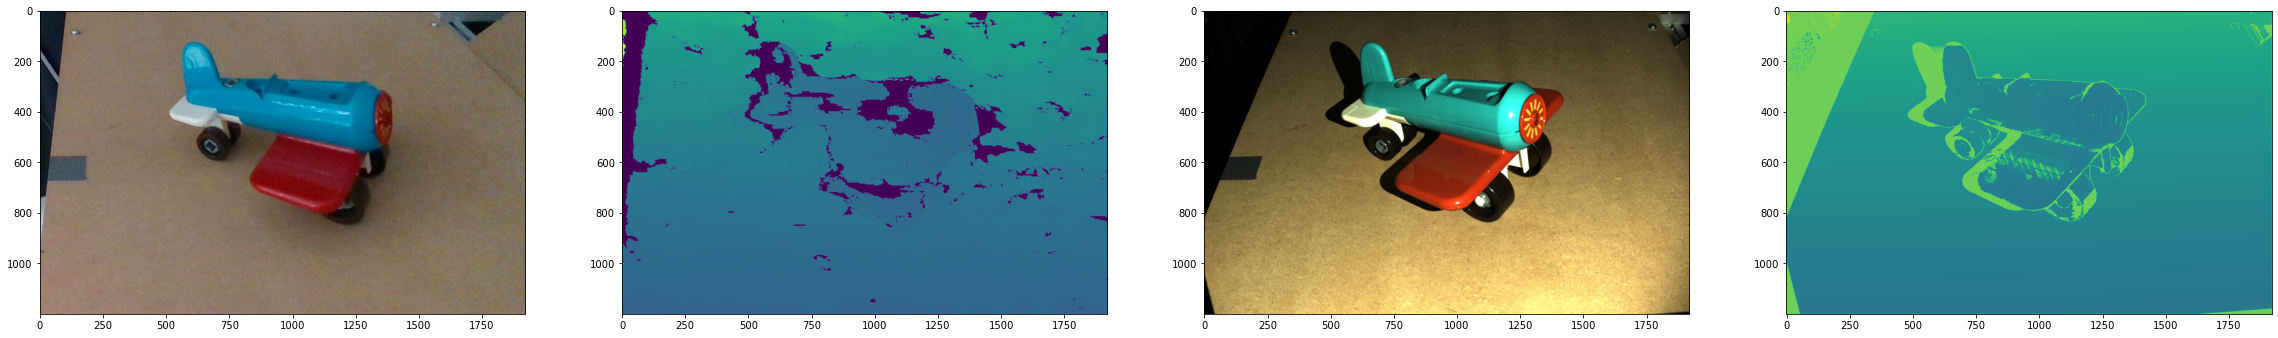

In [35]:
from models.dataset.dataset_interface import DatasetInterface
from matplotlib import pyplot as plt
from pathlib import Path
import numpy as np
import cv2

def visualize_depth(depth):
    # ignore nans for max,min
    max = np.nanmax(depth)
    min = np.nanmin(depth)
    mean = max - min
    # set nan to mean, +inf to max, -inf to min
    depth = np.nan_to_num(depth, nan=mean, posinf=max, neginf=min)
    # map from [min, max] to [0, 255] linearly
    depth = ((depth - min) / max - min) * 255
    depth = depth.astype(np.uint8)
    return depth

dataset = DatasetInterface(Path("../../resources/images/calibrated/rectified/dataset_4/plane"))
rs_rgb, rs_depth, zv_rgb, zv_depth = dataset[1]

rs_depth = visualize_depth(rs_depth)
zv_depth = visualize_depth(zv_depth)

_, axarr = plt.subplots(1, 4, figsize=(40, 10))
axarr[0].imshow(cv2.cvtColor(rs_rgb, cv2.COLOR_BGR2RGB))
axarr[1].imshow(rs_depth)
axarr[2].imshow(cv2.cvtColor(zv_rgb, cv2.COLOR_BGR2RGB))
axarr[3].imshow(zv_depth)

cv2.imwrite("rs_rgb_plane.png", rs_rgb)
cv2.imwrite("rs_depth_plane.png", rs_depth)
cv2.imwrite("zv_rgb_plane.png", zv_rgb)
cv2.imwrite("zv_depth_plane.png", zv_depth)